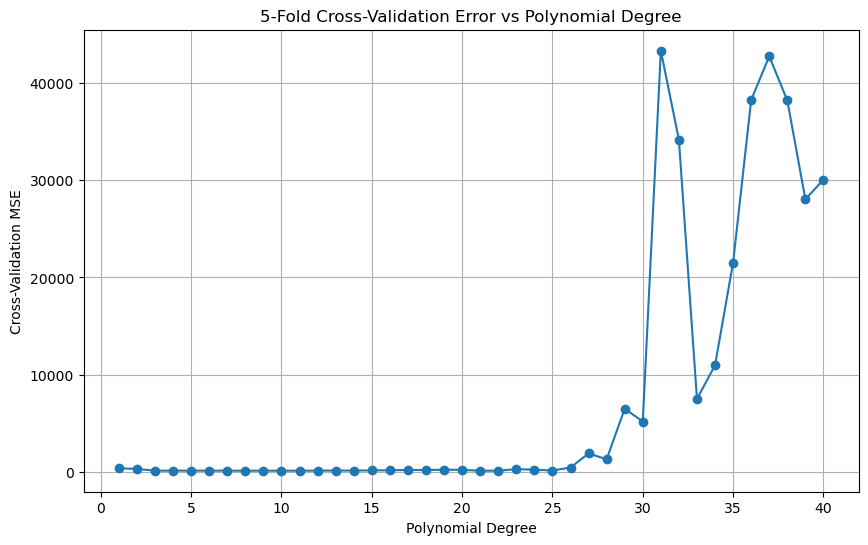

In [9]:
# Reload the dataset without headers and assign column names
data = pd.read_csv('poly_data.csv', header=None)
data.columns = ['x', 'y']  # Assign meaningful column names

# Now, we can proceed with defining x and y based on these new column names
x = data['x'].values.reshape(-1, 1)
y = data['y'].values

# Re-run the cross-validation code to check for any further issues
# Parameters
max_degree = 40
k = 5  # 5-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_errors = []

# Cross-validation for each polynomial degree
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x)
    errors = []
    
    for train_index, val_index in kf.split(x_poly):
        x_train, x_val = x_poly[train_index], x_poly[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        # Train model
        model = LinearRegression()
        model.fit(x_train, y_train)
        
        # Predict and compute MSE
        y_pred = model.predict(x_val)
        mse = mean_squared_error(y_val, y_pred)
        errors.append(mse)
    
    # Average MSE across k folds for this degree
    avg_mse = np.mean(errors)
    cv_errors.append(avg_mse)

# Plot cross-validation error as a function of polynomial degree
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_degree + 1), cv_errors, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validation MSE')
plt.title(f'{k}-Fold Cross-Validation Error vs Polynomial Degree')
plt.grid(True)
plt.show()


In [10]:
# Reload the dataset without headers and assign column names
data = pd.read_csv('poly_data.csv', header=None)
data.columns = ['x', 'y']  # Assign meaningful column names

In [11]:
data

,x,y
0,-2.65,-34.4920
1,0.00,9.5294
2,1.70,24.3220
3,1.65,20.3980
4,0.85,10.8360
...,...,...
116,-0.10,-11.9490
117,-2.25,-20.2510
118,-0.15,6.4258
119,2.65,96.1450


In [12]:
# Now, we can proceed with defining x and y based on these new column names
x = data['x'].values.reshape(-1, 1)
y = data['y'].values

Feature Matrix (x): In scikit-learn, the feature matrix 𝑋
X (input variables) is expected to be a two-dimensional array with shape (n_samples, n_features). Even if you have only one feature (a single column), x needs to be reshaped to (-1, 1) so that it is interpreted as a 2D array with one column and multiple rows (samples).

Target Vector (y): The target vector 𝑦
y (output variable) is typically expected to be a one-dimensional array with shape (n_samples,). Since y is already in this shape, it doesn't require reshaping.



The reshape(-1, 1) function call transforms a one-dimensional array with shape (n_samples,) into a two-dimensional array with shape (n_samples, 1). Here’s what each parameter means:

-1: This is a placeholder that tells Python to infer the dimension based on the length of the array. Since we’re working with a 1D array of n_samples elements, -1 will be automatically set to n_samples.
1: This specifies that we want a single column.
So, reshape(-1, 1) effectively changes the array into a shape of (n_samples, 1), where each row represents one sample, and there’s only one feature (or column).

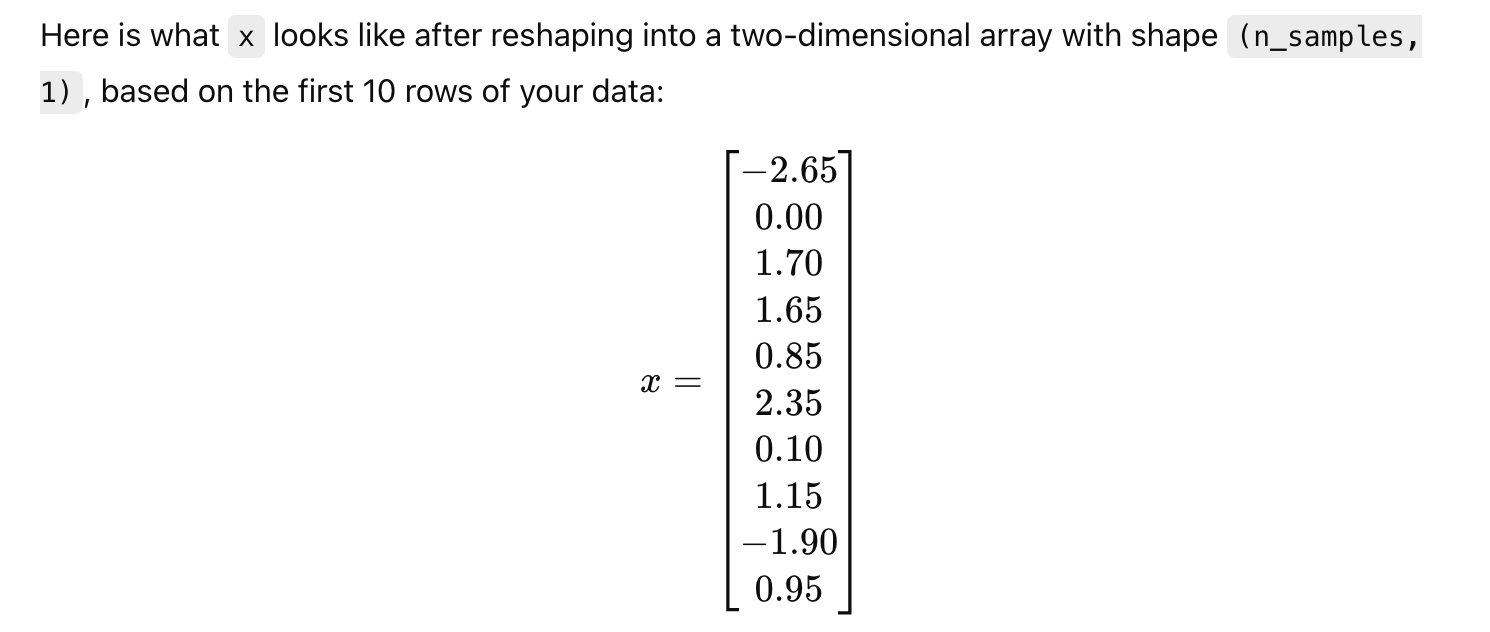

Each entry represents a single feature (in this case, a single column of x values) for a given sample. This 2D structure is compatible with scikit-learn’s requirements for feature matrices.

In [14]:
data['x'].values

array([-2.65,  0.  ,  1.7 ,  1.65,  0.85,  2.35,  0.1 ,  1.15, -1.9 ,
        0.95, -2.05, -1.05, -0.6 , -0.3 , -1.1 , -1.  ,  0.15,  0.7 ,
        2.95, -2.  , -2.45,  2.4 ,  1.5 , -3.  , -2.95,  0.75,  1.45,
        0.5 ,  2.25,  2.6 , -1.55, -2.85, -2.7 , -1.45, -1.65, -2.6 ,
       -1.5 , -2.3 , -1.7 , -0.5 , -2.9 ,  1.25,  0.3 , -0.2 ,  0.25,
       -2.55,  0.45,  0.05,  2.85, -2.4 , -0.8 ,  2.05,  2.75,  0.8 ,
       -2.5 ,  2.5 ,  1.8 ,  0.35, -0.9 , -1.95, -1.25,  1.55, -0.35,
       -0.4 , -1.3 ,  1.1 ,  1.95,  1.6 ,  1.  ,  2.9 , -2.1 ,  1.9 ,
        3.  ,  2.7 , -1.6 , -1.15,  2.2 ,  0.9 , -0.85, -0.25,  1.05,
        1.85, -1.75, -0.7 ,  0.4 , -2.75, -0.65, -2.8 , -2.35,  1.75,
        2.55, -0.75,  2.1 , -2.15,  0.55, -1.8 ,  0.65,  2.3 ,  1.2 ,
       -1.2 ,  0.6 , -1.4 ,  1.35, -1.35,  2.45, -1.85,  0.2 ,  2.8 ,
       -0.55, -0.05,  1.3 ,  2.  ,  1.4 , -2.2 , -0.95, -0.45, -0.1 ,
       -2.25, -0.15,  2.65,  2.15])

In [17]:
data['x'].values.reshape(-1,1)

array([[-2.65],
       [ 0.  ],
       [ 1.7 ],
       [ 1.65],
       [ 0.85],
       [ 2.35],
       [ 0.1 ],
       [ 1.15],
       [-1.9 ],
       [ 0.95],
       [-2.05],
       [-1.05],
       [-0.6 ],
       [-0.3 ],
       [-1.1 ],
       [-1.  ],
       [ 0.15],
       [ 0.7 ],
       [ 2.95],
       [-2.  ],
       [-2.45],
       [ 2.4 ],
       [ 1.5 ],
       [-3.  ],
       [-2.95],
       [ 0.75],
       [ 1.45],
       [ 0.5 ],
       [ 2.25],
       [ 2.6 ],
       [-1.55],
       [-2.85],
       [-2.7 ],
       [-1.45],
       [-1.65],
       [-2.6 ],
       [-1.5 ],
       [-2.3 ],
       [-1.7 ],
       [-0.5 ],
       [-2.9 ],
       [ 1.25],
       [ 0.3 ],
       [-0.2 ],
       [ 0.25],
       [-2.55],
       [ 0.45],
       [ 0.05],
       [ 2.85],
       [-2.4 ],
       [-0.8 ],
       [ 2.05],
       [ 2.75],
       [ 0.8 ],
       [-2.5 ],
       [ 2.5 ],
       [ 1.8 ],
       [ 0.35],
       [-0.9 ],
       [-1.95],
       [-1.25],
       [ 1.55],
       [

In [16]:
data['y'].values

array([-34.492  ,   9.5294 ,  24.322  ,  20.398  ,  10.836  ,  64.841  ,
         1.4185 ,  13.691  ,  -2.7071 ,  15.042  ,  -2.662  ,  16.267  ,
        -1.6569 , -12.038  , -12.157  ,  -4.1616 ,   9.3856 ,  -4.5511 ,
       117.76   , -17.561  , -14.353  ,  56.754  ,  31.206  , -63.731  ,
       -50.293  ,   2.3423 ,  29.12   ,   0.3932 ,  67.995  ,  96.401  ,
       -17.492  , -43.708  , -34.377  ,  -3.0731 , -18.275  , -25.084  ,
       -22.932  , -22.819  ,  11.566  ,   8.0238 , -52.006  ,  11.293  ,
        -2.8304 ,   6.4887 ,  17.567  ,  -5.764  ,   3.6452 ,  12.397  ,
       101.39   , -20.141  ,  13.201  ,  31.205  ,  99.398  ,   3.1077 ,
       -25.214  ,  79.768  ,  17.714  ,  -3.4477 ,  -5.1044 ,  -7.3598 ,
         3.5085 ,  30.98   ,  10.41   ,  19.679  ,   0.871  ,  13.96   ,
        39.029  ,  29.633  ,   1.4641 , 100.56   ,  -9.9498 ,  37.208  ,
       104.11   , 102.81   ,  -3.0528 ,  -2.629  ,  45.178  ,  11.247  ,
         3.1094 ,   5.0103 ,  12.925  ,  30.382  , 

## Cross-validation for each polynomial degree

In [18]:
# Re-run the cross-validation code to check for any further issues
# Parameters
max_degree = 40
k = 5  # 5-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_errors = []

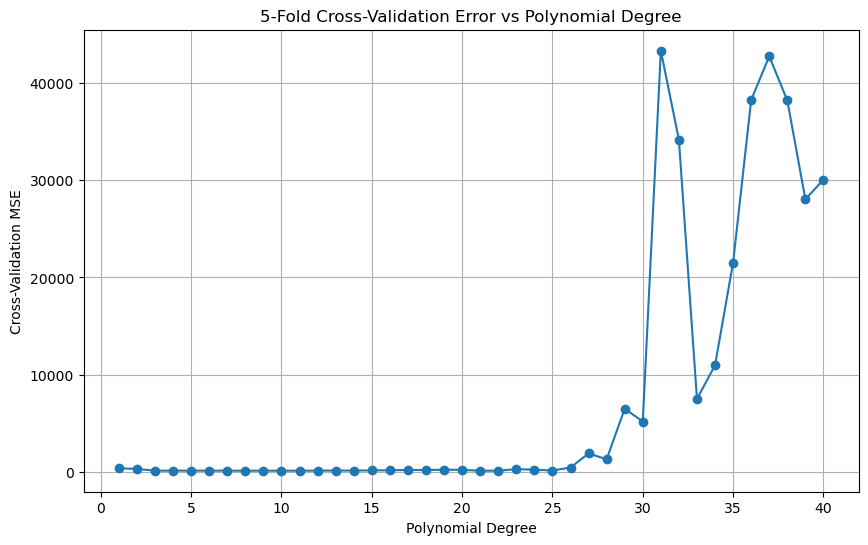

In [25]:
# Cross-validation for each polynomial degree
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x)
    errors = []
    for train_index, val_index in kf.split(x_poly):
        x_train, x_val = x_poly[train_index], x_poly[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        # Train model
        model = LinearRegression()
        model.fit(x_train, y_train)
        
        # Predict and compute MSE
        y_pred = model.predict(x_val)
        mse = mean_squared_error(y_val, y_pred)
        errors.append(mse)
    
    # Average MSE across k folds for this degree
    avg_mse = np.mean(errors)
    cv_errors.append(avg_mse)
    
# Plot cross-validation error as a function of polynomial degree
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_degree + 1), cv_errors, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validation MSE')
plt.title(f'{k}-Fold Cross-Validation Error vs Polynomial Degree')
plt.grid(True)
plt.show()

for degree in range(1, max_degree + 1):

這行程式碼設定了迴圈的範圍，從 1 到 max_degree（例如 40）。每次迴圈代表我們要訓練一個不同階數的多項式模型（例如，1 次方、2 次方……一直到 max_degree 次方）。
poly = PolynomialFeatures(degree)

這行程式碼建立了一個 PolynomialFeatures 的實例，並指定了 degree。PolynomialFeatures 是 scikit-learn 中的一個類別，用來生成指定階數的多項式特徵。
當 degree=2 時，它會產生 x 和 x^2 的特徵；當 degree=3 時，會產生 x、x^2 和 x^3 的特徵，以此類推。
print("poly: ", poly) 這行則用來檢查 poly 物件，顯示出當前的多項式階數。

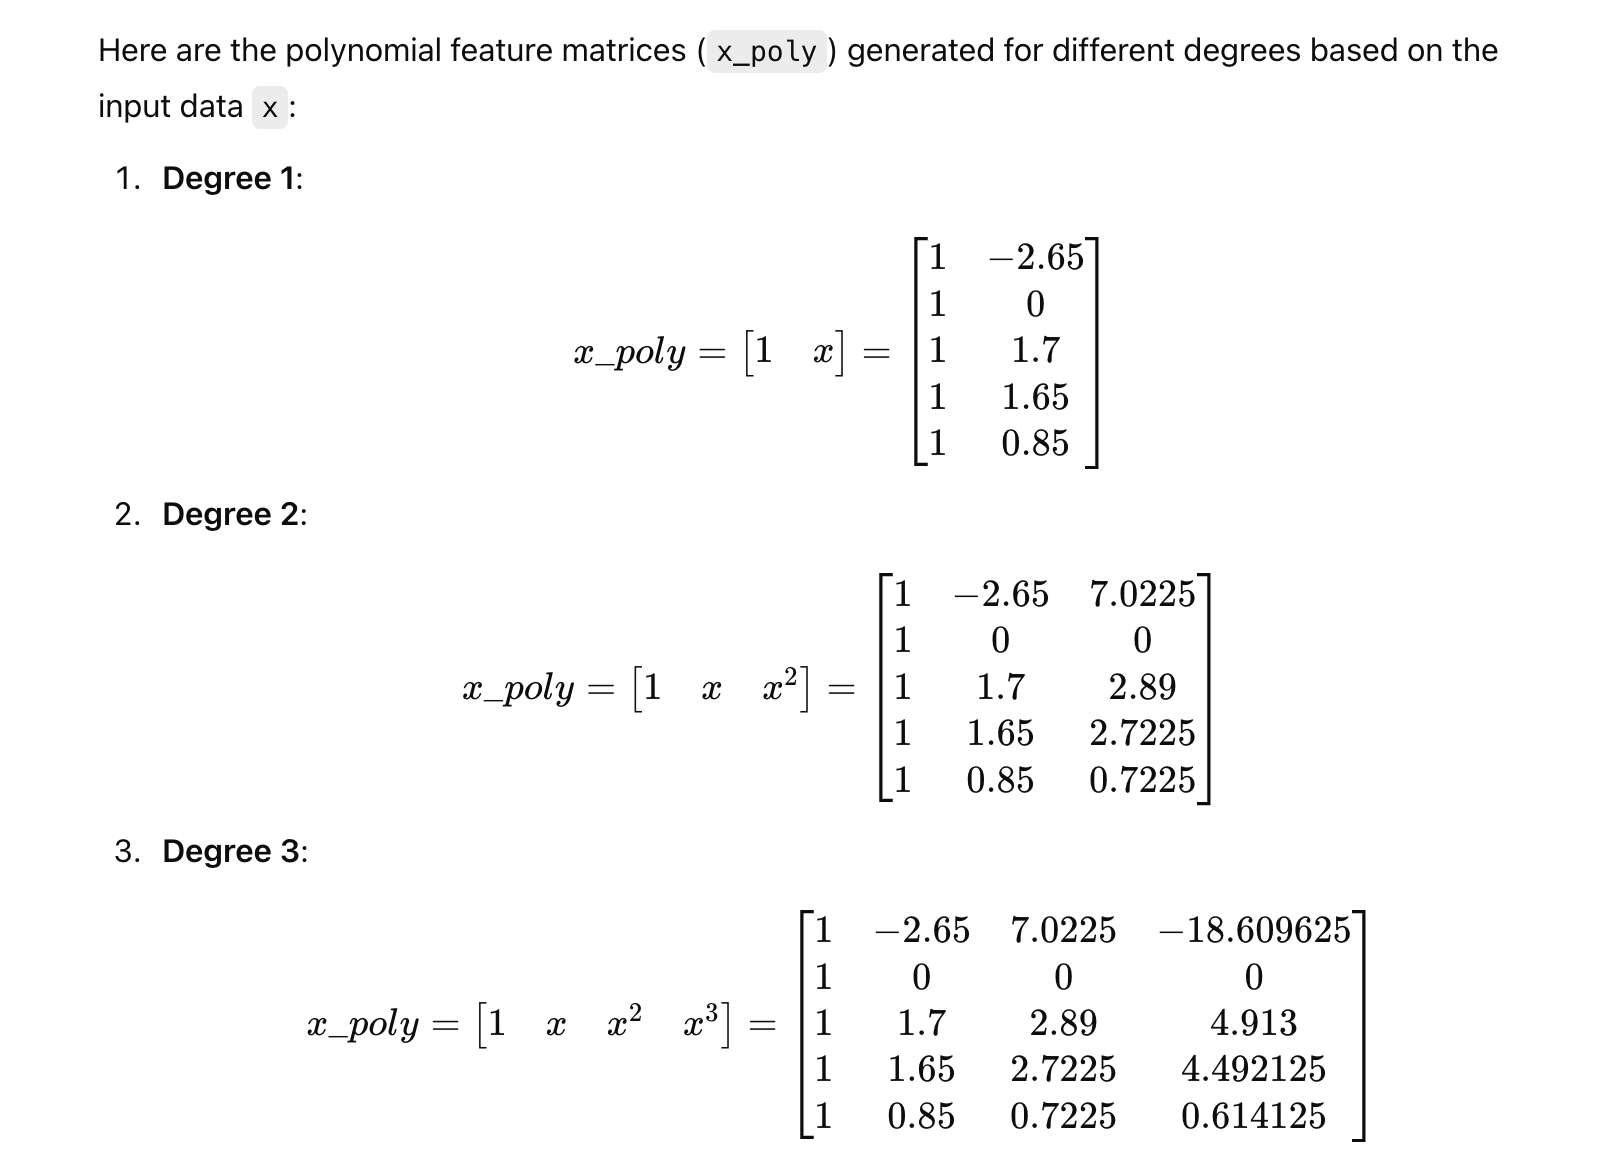

This code snippet is part of a k-fold cross-validation loop, where each iteration splits the data into training and validation sets based on the indices provided by kf.split(x_poly). Here’s a breakdown of each line:

for train_index, val_index in kf.split(x_poly):

The kf.split(x_poly) function is part of the KFold object (kf), which splits x_poly (the polynomial feature matrix) into k (typically 5 or 10) different train-validation pairs.
For each fold, kf.split(x_poly) returns two arrays: train_index and val_index, which are the indices for the training and validation samples, respectively.
x_train, x_val = x_poly[train_index], x_poly[val_index]

This line uses the indices to split x_poly into training and validation sets.
x_train contains the rows of x_poly corresponding to train_index, and x_val contains the rows corresponding to val_index.
y_train, y_val = y[train_index], y[val_index]

Similarly, y_train and y_val are created by selecting rows from y using train_index and val_index.
This ensures that the target values y are split in the same way as the features x_poly, maintaining the alignment between features and target values.

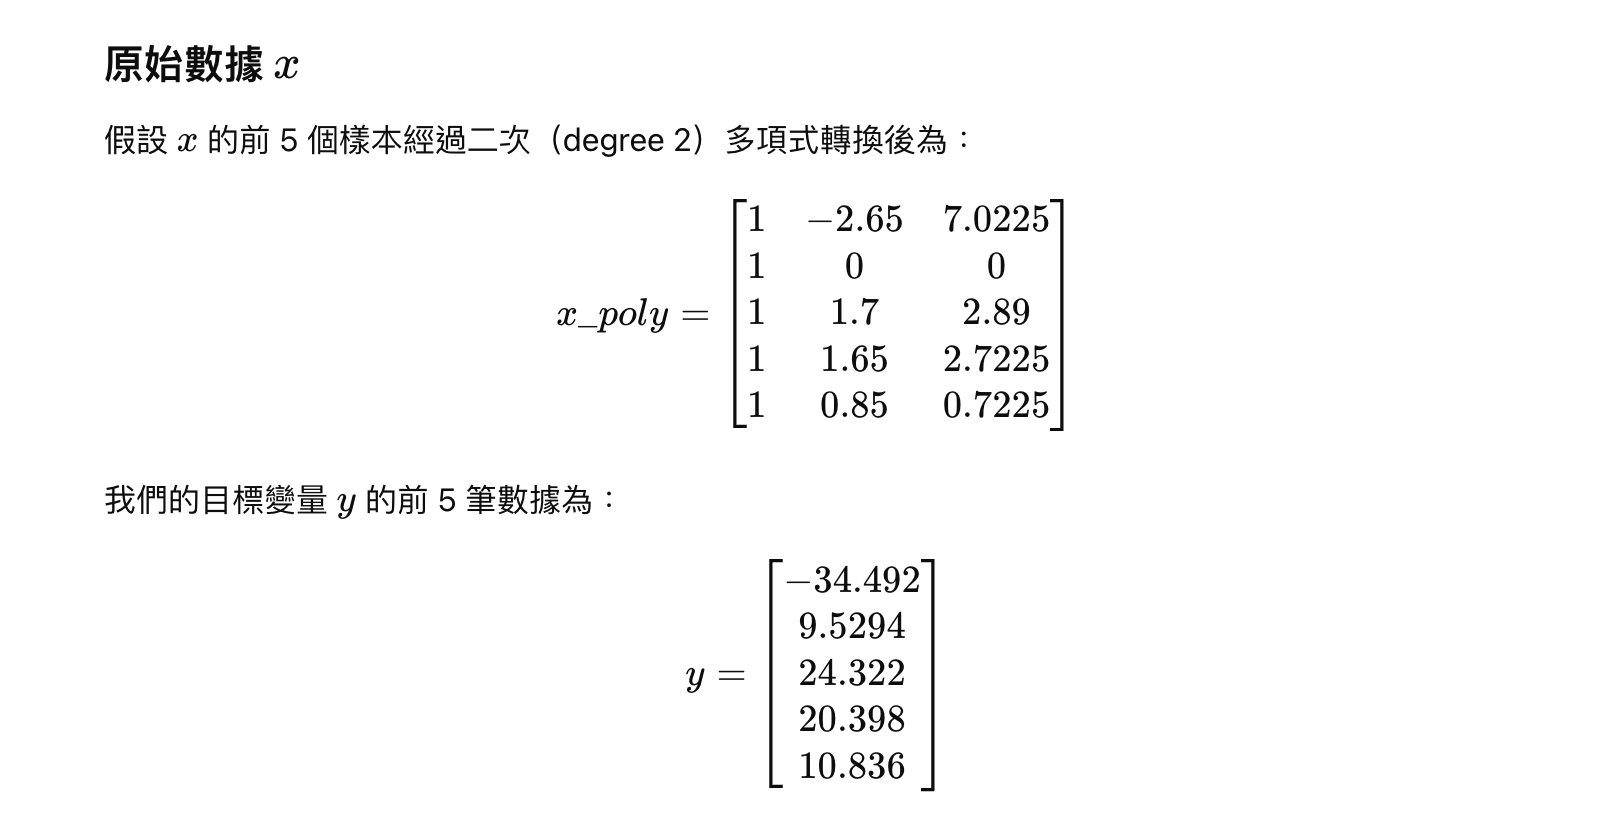

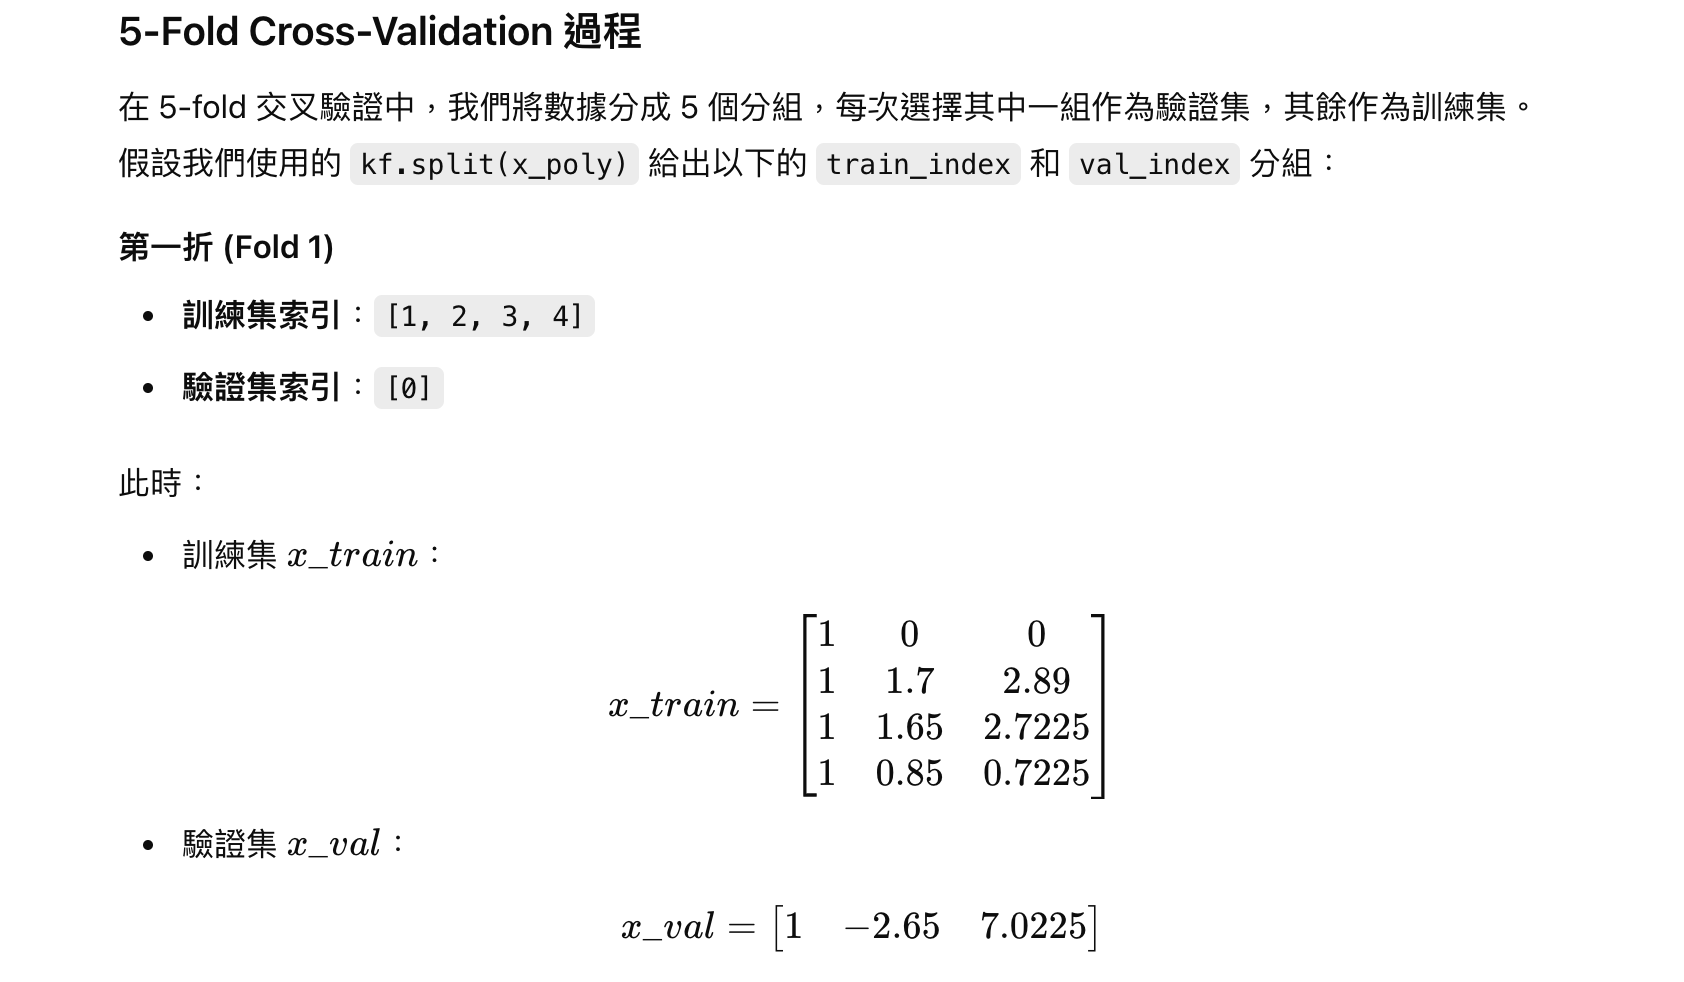

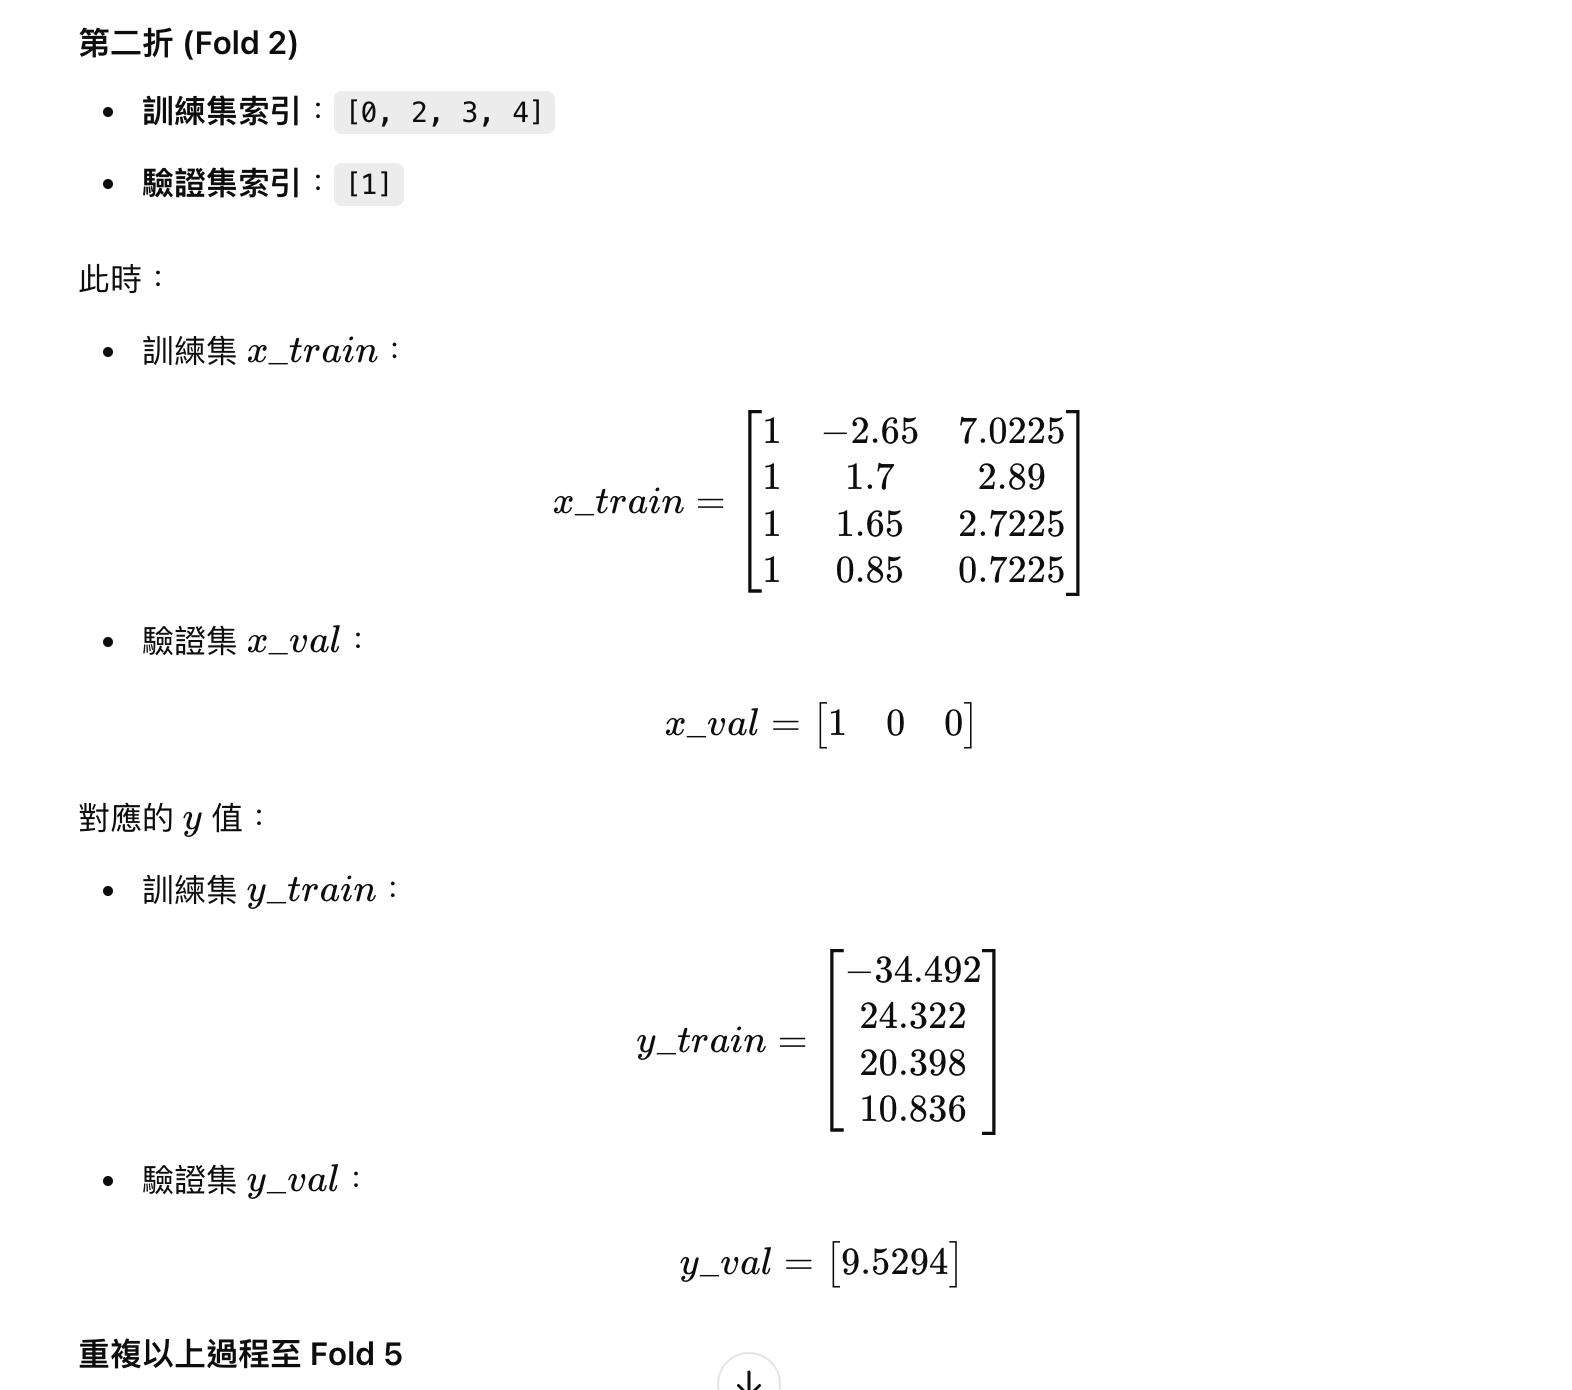

Why we can use linear model?

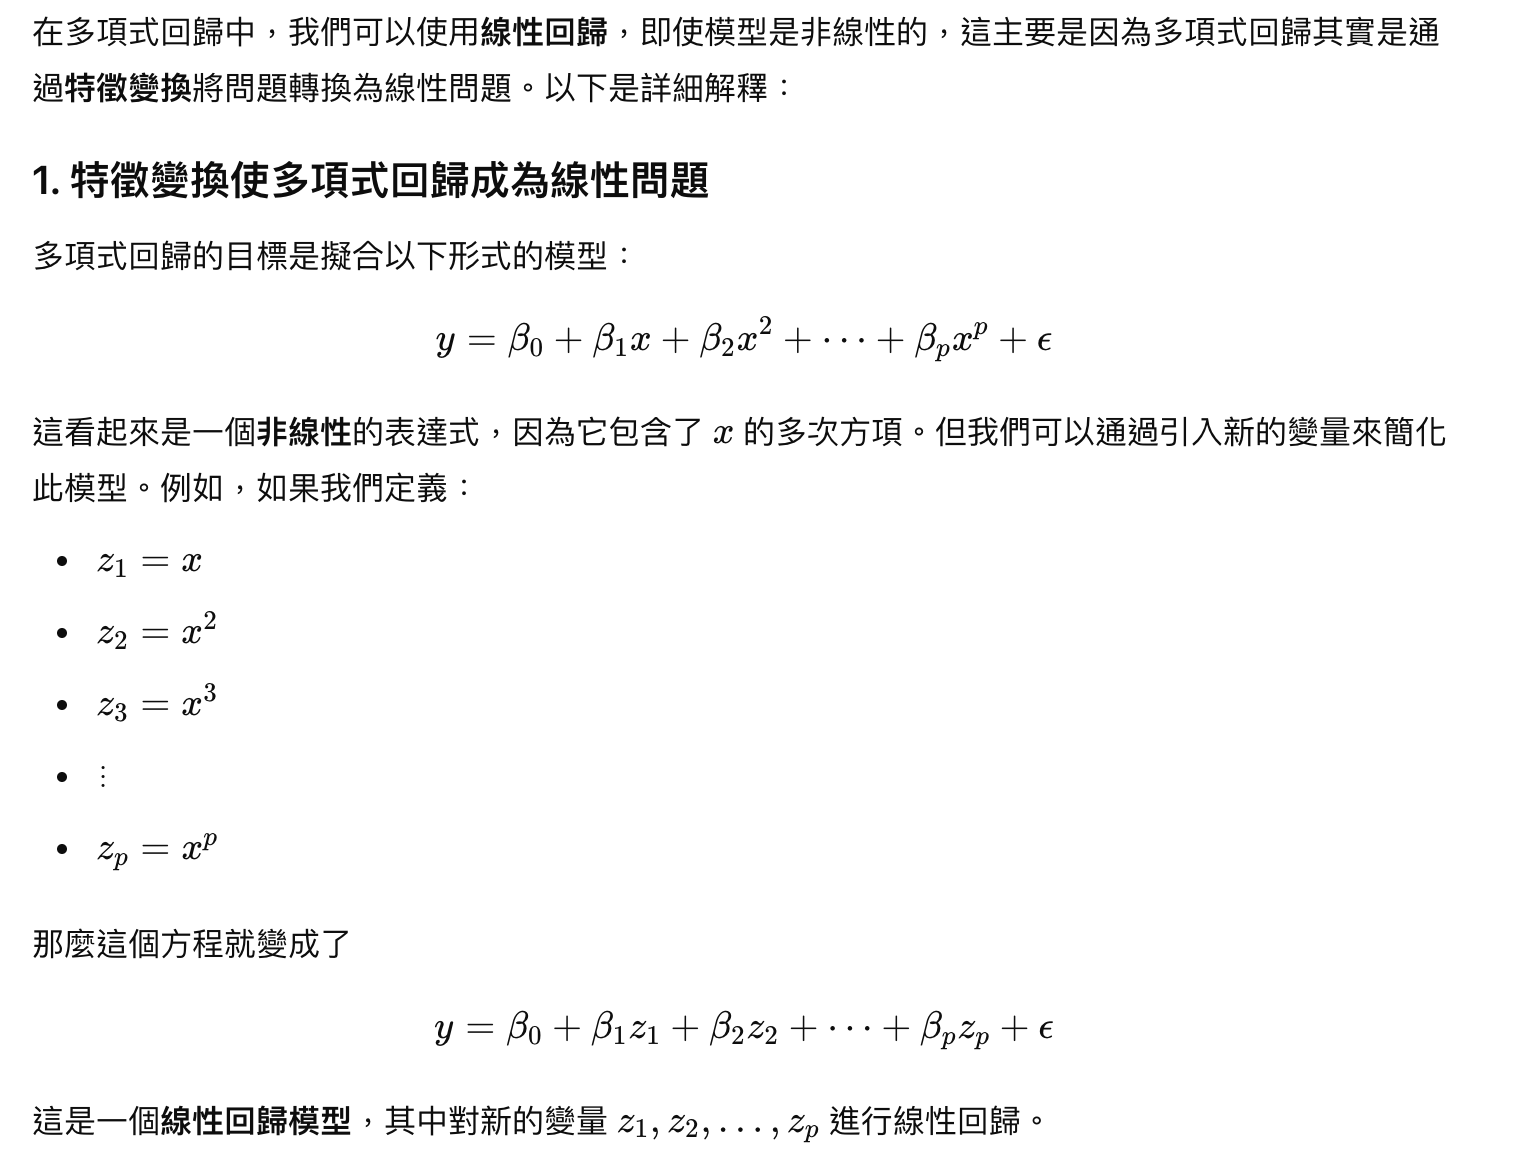

### Choose the best polynomial model obtained from the previous part, and use to it regress the entire dataset. Report the polynomial coefficients and make a scatter plot of the xi and yi with your fitted polynomial.

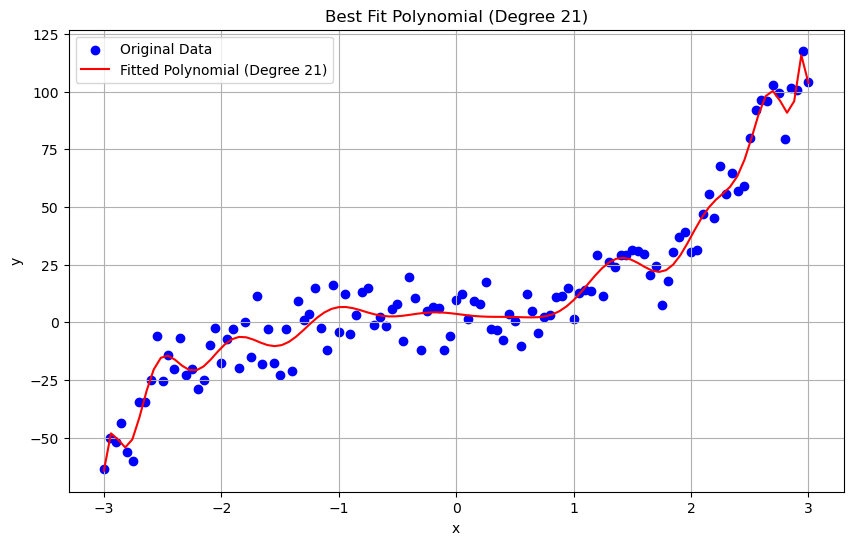

(21,
 3.667859031465923,
 array([ 0.00000000e+00, -6.36404163e+00, -4.82053838e+00,  5.70395683e+01,
        -1.33161651e+01, -1.88807343e+02,  7.18610643e+01,  2.73532140e+02,
        -8.26650643e+01, -1.97475234e+02,  4.47701875e+01,  8.07976812e+01,
        -1.35883026e+01, -1.99992835e+01,  2.44492359e+00,  3.05638626e+00,
        -2.58988876e-01, -2.82112697e-01,  1.49208168e-02,  1.44213648e-02,
        -3.60543910e-04, -3.13539592e-04]))

In [26]:
from sklearn.linear_model import LinearRegression

# Find the degree with the lowest cross-validation error from the previous part
best_degree = np.argmin(cv_errors) + 1  # Adding 1 because degrees start from 1
best_poly = PolynomialFeatures(best_degree)
x_poly_best = best_poly.fit_transform(x)

# Fit linear regression on the transformed features for the entire dataset
model = LinearRegression()
model.fit(x_poly_best, y)

# Retrieve the polynomial coefficients
coefficients = model.coef_
intercept = model.intercept_

# Generate predictions for plotting
x_plot = np.linspace(min(x), max(x), 100).reshape(-1, 1)
x_plot_poly = best_poly.transform(x_plot)
y_plot = model.predict(x_plot_poly)

# Plot the original data and the fitted polynomial
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="blue", label="Original Data")
plt.plot(x_plot, y_plot, color="red", label=f"Fitted Polynomial (Degree {best_degree})")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Best Fit Polynomial (Degree {best_degree})")
plt.legend()
plt.grid(True)
plt.show()

# Output the best polynomial degree and coefficients
best_degree, intercept, coefficients


In [27]:
x

array([[-2.65],
       [ 0.  ],
       [ 1.7 ],
       [ 1.65],
       [ 0.85],
       [ 2.35],
       [ 0.1 ],
       [ 1.15],
       [-1.9 ],
       [ 0.95],
       [-2.05],
       [-1.05],
       [-0.6 ],
       [-0.3 ],
       [-1.1 ],
       [-1.  ],
       [ 0.15],
       [ 0.7 ],
       [ 2.95],
       [-2.  ],
       [-2.45],
       [ 2.4 ],
       [ 1.5 ],
       [-3.  ],
       [-2.95],
       [ 0.75],
       [ 1.45],
       [ 0.5 ],
       [ 2.25],
       [ 2.6 ],
       [-1.55],
       [-2.85],
       [-2.7 ],
       [-1.45],
       [-1.65],
       [-2.6 ],
       [-1.5 ],
       [-2.3 ],
       [-1.7 ],
       [-0.5 ],
       [-2.9 ],
       [ 1.25],
       [ 0.3 ],
       [-0.2 ],
       [ 0.25],
       [-2.55],
       [ 0.45],
       [ 0.05],
       [ 2.85],
       [-2.4 ],
       [-0.8 ],
       [ 2.05],
       [ 2.75],
       [ 0.8 ],
       [-2.5 ],
       [ 2.5 ],
       [ 1.8 ],
       [ 0.35],
       [-0.9 ],
       [-1.95],
       [-1.25],
       [ 1.55],
       [

Q2

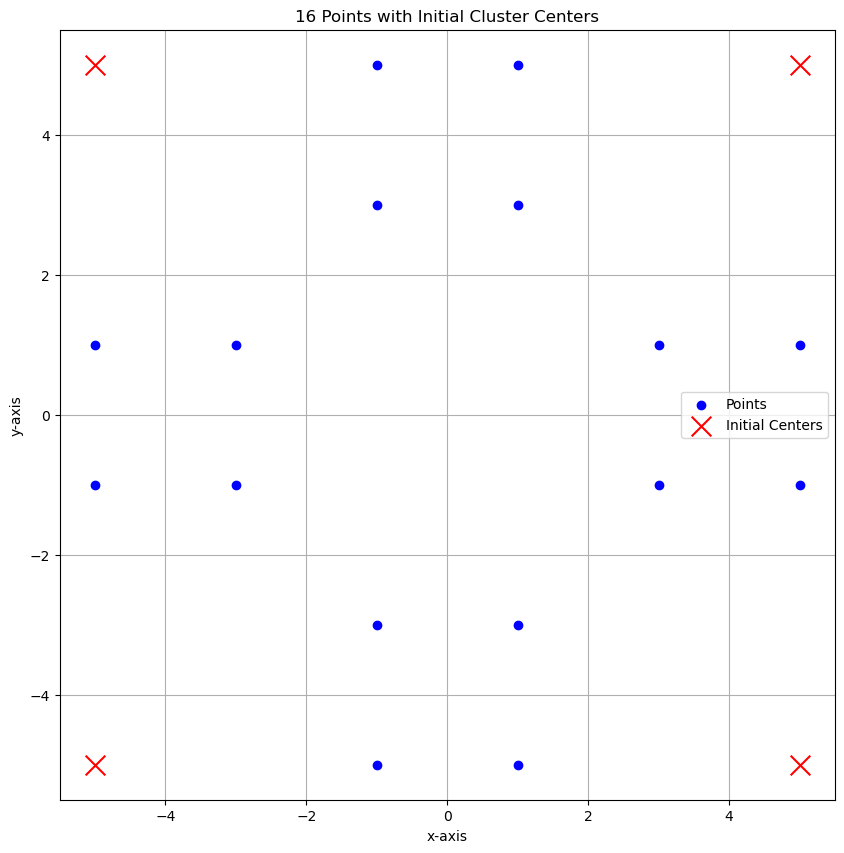

In [28]:
import matplotlib.pyplot as plt

# Define the 16 points
points = [
    (-5, 1), (-5, -1), (-3, 1), (-3, -1),
    (1, 5), (-1, 5), (1, 3), (-1, 3),
    (5, 1), (5, -1), (3, 1), (3, -1),
    (1, -5), (-1, -5), (1, -3), (-1, -3)
]

# Define initial cluster centers C0
initial_centers = [(-5, 5), (-5, -5), (5, -5), (5, 5)]

# Plotting the points and initial cluster centers
plt.figure(figsize=(10, 10))
plt.scatter(*zip(*points), color="blue", label="Points")
plt.scatter(*zip(*initial_centers), color="red", marker="x", s=200, label="Initial Centers")

# Add labels and grid
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("16 Points with Initial Cluster Centers")
plt.grid(True)
plt.legend()
plt.show()


[[-5  1]
 [-3  1]
 [-1  5]
 [-1  3]] [0 1 0 1 3 0 3 0 3 2 3 2 2 1 2 1]
[[-5 -1]
 [-3 -1]
 [-1 -5]
 [-1 -3]] [0 1 0 1 3 0 3 0 3 2 3 2 2 1 2 1]
[[ 5 -1]
 [ 3 -1]
 [ 1 -5]
 [ 1 -3]] [0 1 0 1 3 0 3 0 3 2 3 2 2 1 2 1]
[[1 5]
 [1 3]
 [5 1]
 [3 1]] [0 1 0 1 3 0 3 0 3 2 3 2 2 1 2 1]


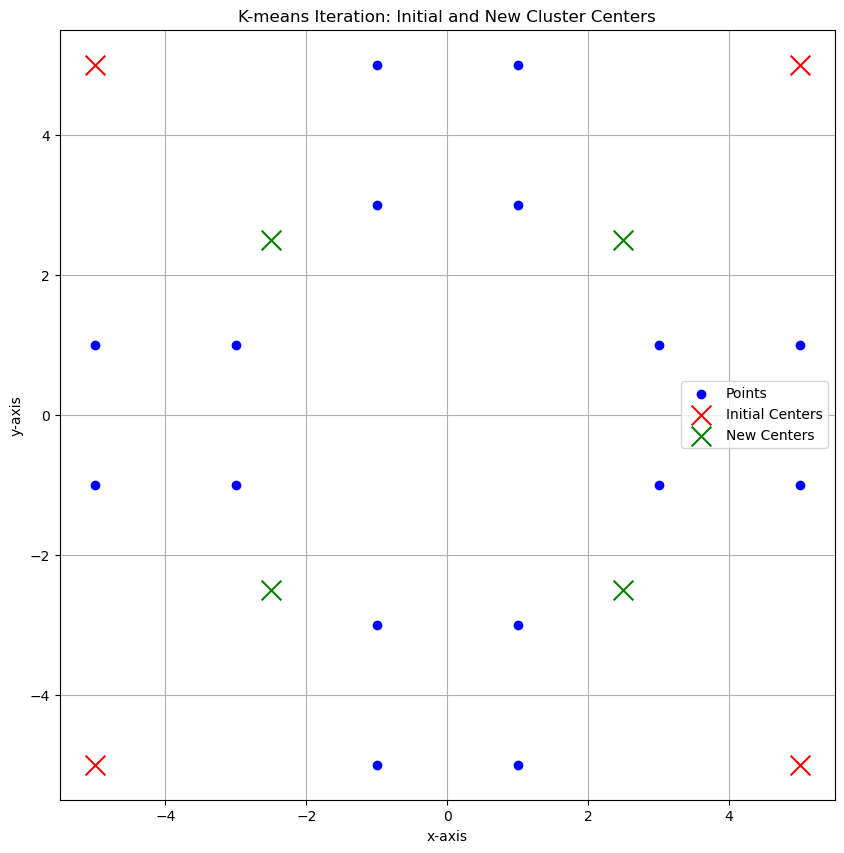

(array([0, 1, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 2, 1, 2, 1]),
 [array([-2.5,  2.5]),
  array([-2.5, -2.5]),
  array([ 2.5, -2.5]),
  array([2.5, 2.5])])

In [31]:
from scipy.spatial.distance import cdist
import numpy as np

# Define the initial cluster centers C0
initial_centers = np.array([
    [-5, 5],
    [-5, -5],
    [5, -5],
    [5, 5]
])

# Convert points to numpy array for calculation
points_array = np.array(points)

# Compute distances from each point to each cluster center
distances = cdist(points_array, initial_centers)

# Find the closest cluster for each point
closest_clusters = np.argmin(distances, axis=1)

# Group points by their closest clusters and calculate new centers
new_centers = []
for i in range(len(initial_centers)):
    cluster_points = points_array[closest_clusters == i]
    print(cluster_points)
    if len(cluster_points) > 0:
        # Calculate the approximate centroid
        new_center = cluster_points.mean(axis=0)
    else:
        # If no points in cluster, keep the original center
        new_center = initial_centers[i]
    new_centers.append(new_center)

# Plotting the points, initial centers, and new centers
plt.figure(figsize=(10, 10))
plt.scatter(*zip(*points), color="blue", label="Points")
plt.scatter(*zip(*initial_centers), color="red", marker="x", s=200, label="Initial Centers")
plt.scatter(*zip(*new_centers), color="green", marker="x", s=200, label="New Centers")

# Add labels and grid
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("K-means Iteration: Initial and New Cluster Centers")
plt.grid(True)
plt.legend()
plt.show()

# Display the closest cluster assignment for each point and the new centers
closest_clusters, new_centers


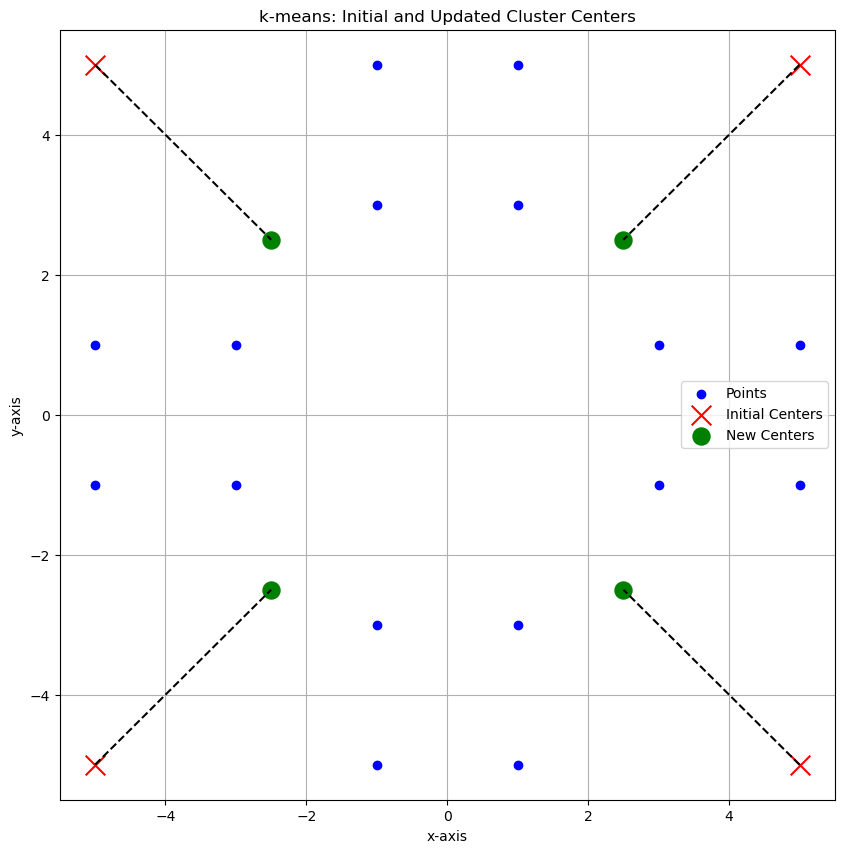

({'Center 0': [[-5, 1], [-3, 1], [-1, 5], [-1, 3]],
  'Center 1': [[-5, -1], [-3, -1], [-1, -5], [-1, -3]],
  'Center 2': [[5, -1], [3, -1], [1, -5], [1, -3]],
  'Center 3': [[1, 5], [1, 3], [5, 1], [3, 1]]},
 [array([-2.5,  2.5]),
  array([-2.5, -2.5]),
  array([ 2.5, -2.5]),
  array([2.5, 2.5])])

In [32]:
import numpy as np

# Convert points and initial centers to numpy arrays for calculations
points_array = np.array(points)
centers_array = np.array(initial_centers)

# Calculate the distance of each point to each center in C0
distances = np.linalg.norm(points_array[:, np.newaxis] - centers_array, axis=2)

# Find the closest center for each point
closest_centers = np.argmin(distances, axis=1)

# Organize points by cluster
clusters = {i: points_array[closest_centers == i] for i in range(len(initial_centers))}

# Calculate new cluster centers as approximate centroids
new_centers = [np.mean(cluster, axis=0) if len(cluster) > 0 else centers_array[i] for i, cluster in clusters.items()]

# Plot the points, initial cluster centers, and new cluster centers
plt.figure(figsize=(10, 10))
plt.scatter(*zip(*points), color="blue", label="Points")
plt.scatter(*zip(*initial_centers), color="red", marker="x", s=200, label="Initial Centers")
plt.scatter(*zip(*new_centers), color="green", marker="o", s=150, label="New Centers")

# Add lines showing movement from initial to new centers
for old_center, new_center in zip(initial_centers, new_centers):
    plt.plot([old_center[0], new_center[0]], [old_center[1], new_center[1]], "k--")

# Add labels and grid
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("k-means: Initial and Updated Cluster Centers")
plt.grid(True)
plt.legend()
plt.show()

# Display which points are closest to each initial cluster center
cluster_assignments = {f"Center {i}": cluster.tolist() for i, cluster in clusters.items()}
cluster_assignments, new_centers

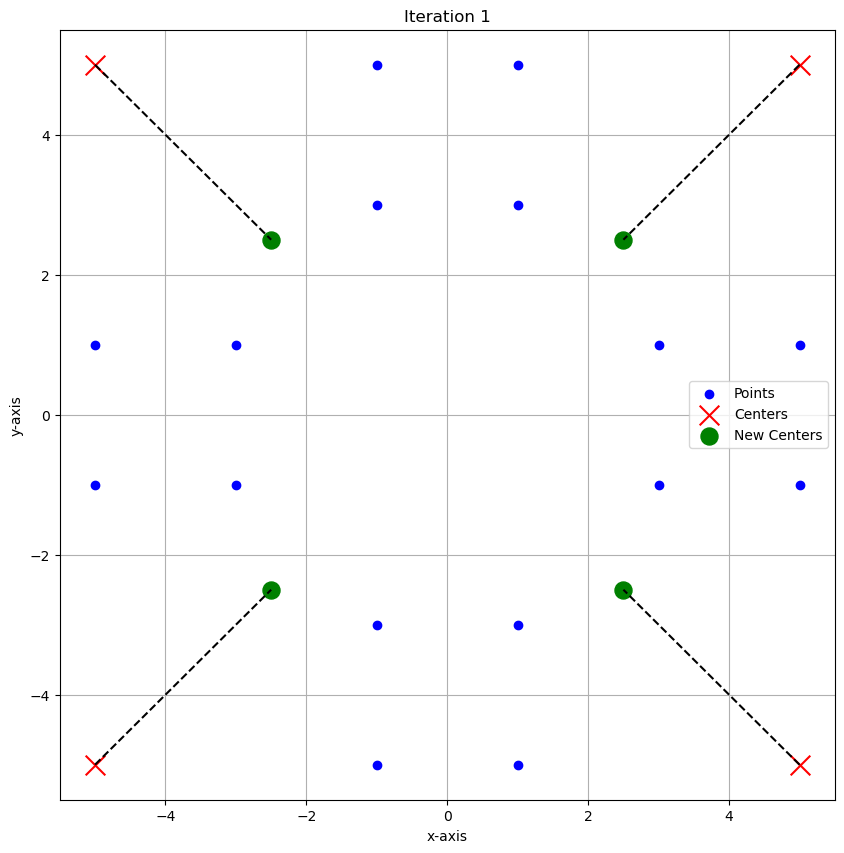

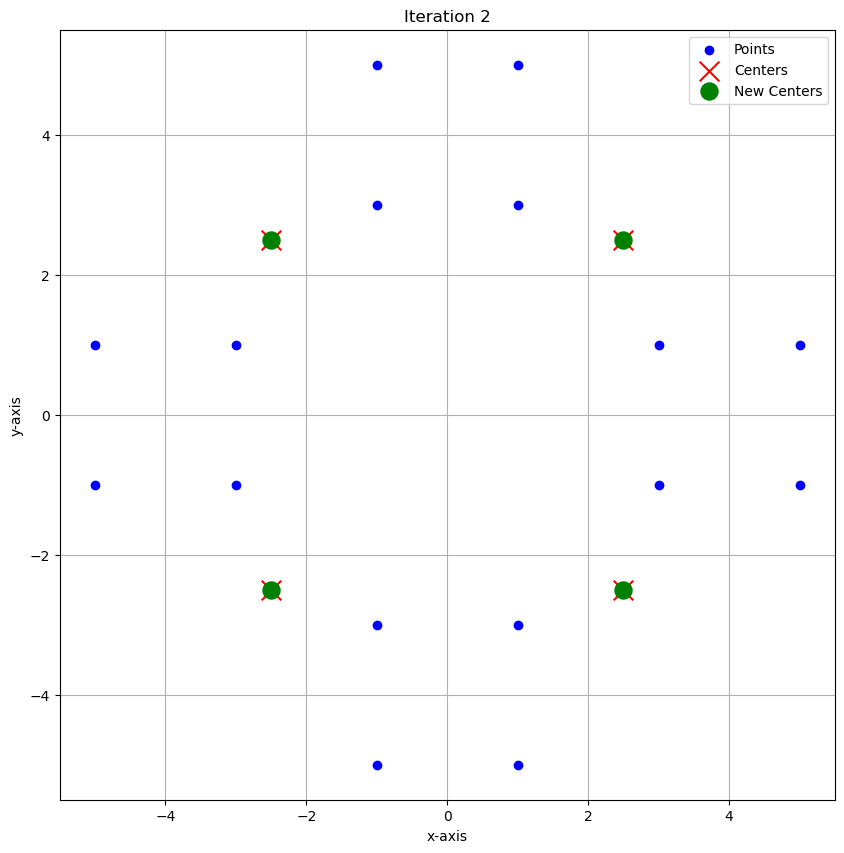

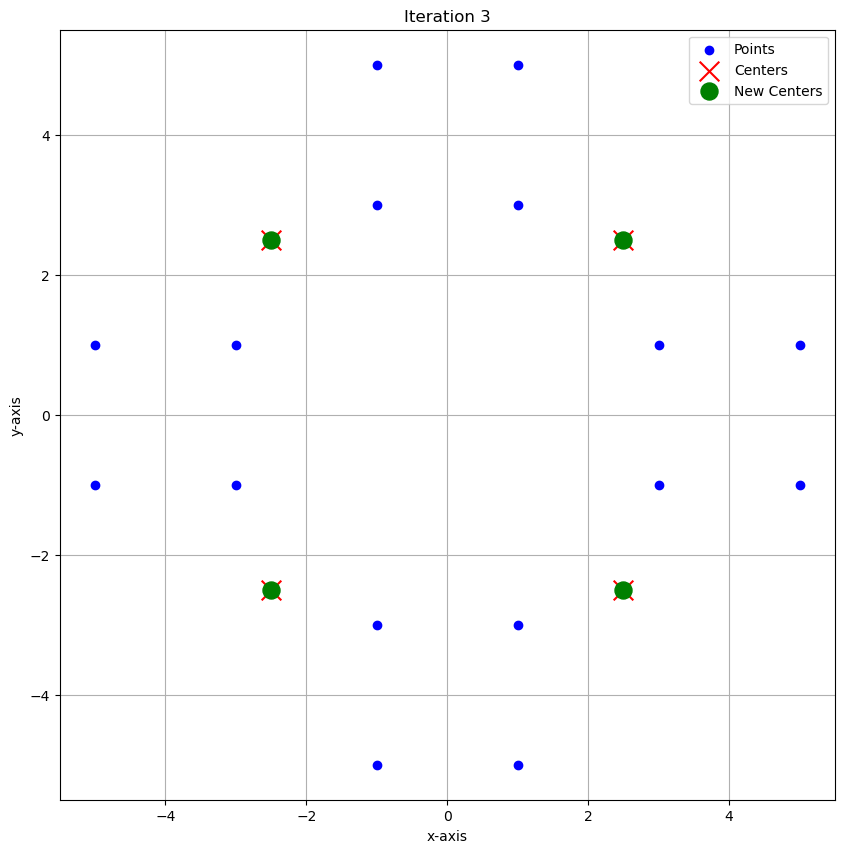

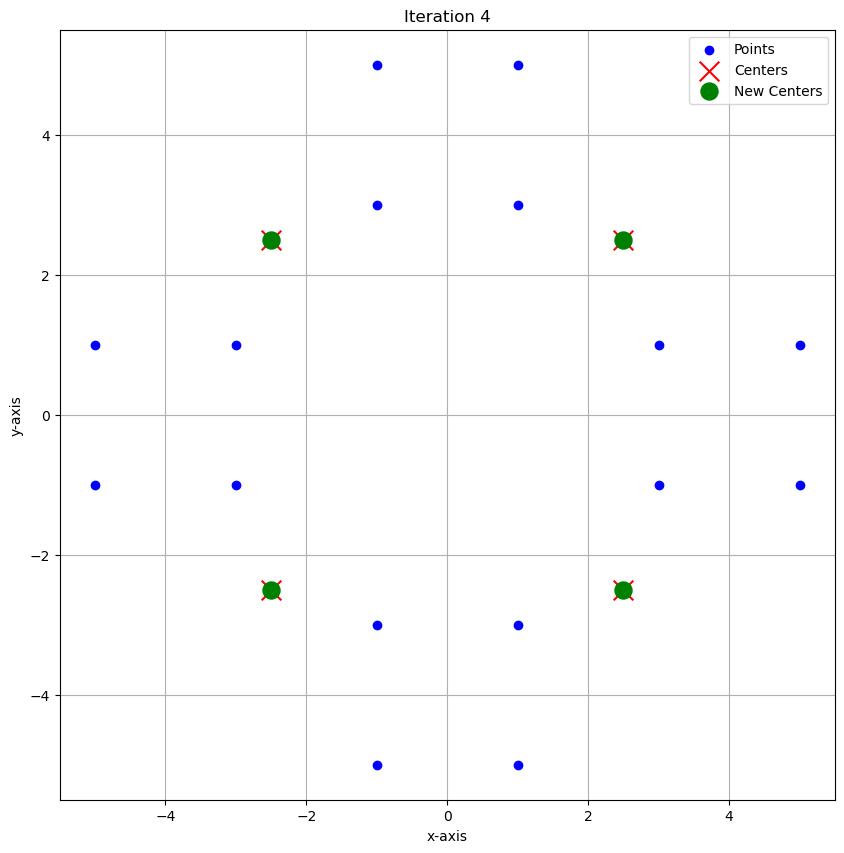

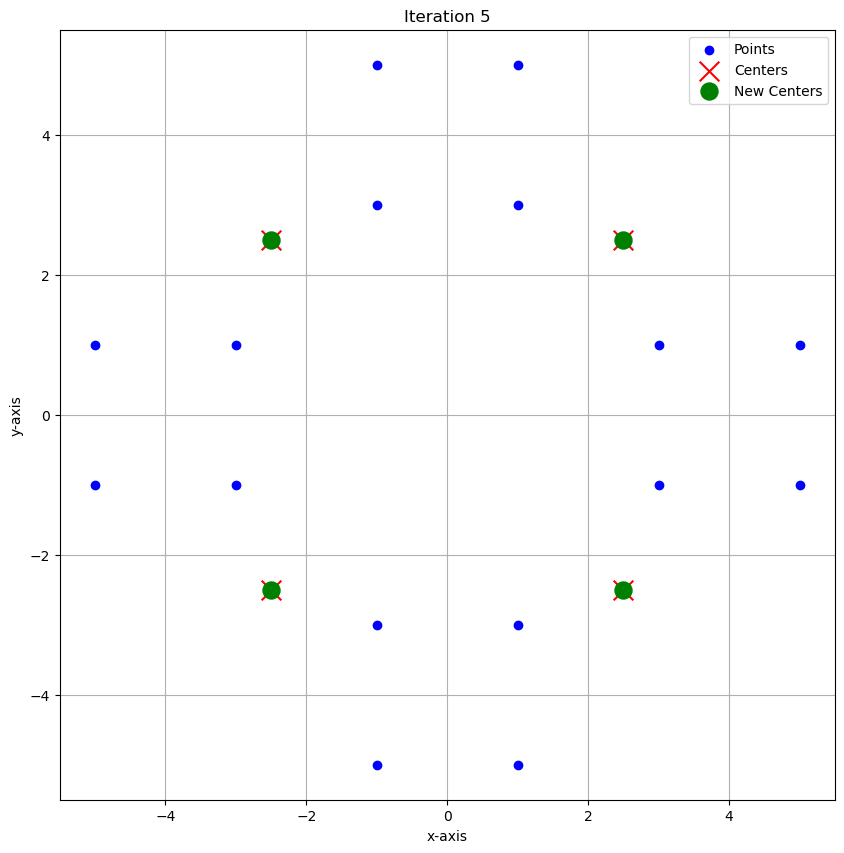

({'Center 0': [[-5, 1], [-3, 1], [-1, 5], [-1, 3]],
  'Center 1': [[-5, -1], [-3, -1], [-1, -5], [-1, -3]],
  'Center 2': [[5, -1], [3, -1], [1, -5], [1, -3]],
  'Center 3': [[1, 5], [1, 3], [5, 1], [3, 1]]},
 array([[-2.5,  2.5],
        [-2.5, -2.5],
        [ 2.5, -2.5],
        [ 2.5,  2.5]]))

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial data and initial centers
points = np.array([
    (-5, 1), (-5, -1), (-3, 1), (-3, -1),
    (1, 5), (-1, 5), (1, 3), (-1, 3),
    (5, 1), (5, -1), (3, 1), (3, -1),
    (1, -5), (-1, -5), (1, -3), (-1, -3)
])
initial_centers = np.array([(-5, 5), (-5, -5), (5, -5), (5, 5)])

def assign_clusters(points, centers):
    """Assign each point to the nearest center."""
    distances = np.linalg.norm(points[:, np.newaxis] - centers, axis=2)
    closest_centers = np.argmin(distances, axis=1)
    return closest_centers

def update_centers(points, closest_centers, centers):
    """Calculate new centers as the mean of assigned points for each cluster."""
    new_centers = []
    cluster_assignments = {}
    for i in range(len(centers)):
        cluster_points = points[closest_centers == i]
        cluster_assignments[f"Center {i}"] = cluster_points.tolist()  # Assign points to clusters
        if len(cluster_points) > 0:
            new_centers.append(cluster_points.mean(axis=0))
        else:
            new_centers.append(centers[i])  # Keep old center if no points assigned
    return np.array(new_centers), cluster_assignments

def plot_clusters(points, centers, new_centers=None, iteration=None):
    """Plot points, centers, and optionally new centers with transition lines."""
    plt.figure(figsize=(10, 10))
    plt.scatter(points[:, 0], points[:, 1], color="blue", label="Points")
    plt.scatter(centers[:, 0], centers[:, 1], color="red", marker="x", s=200, label="Centers")

    if new_centers is not None:
        plt.scatter(new_centers[:, 0], new_centers[:, 1], color="green", marker="o", s=150, label="New Centers")
        for old, new in zip(centers, new_centers):
            plt.plot([old[0], new[0]], [old[1], new[1]], "k--")
    
    title = f"Iteration {iteration}" if iteration is not None else "Final Result"
    plt.title(title)
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
max_iterations = 5
centers = initial_centers.copy()

# Run k-means for multiple iterations
for i in range(max_iterations):
    closest_centers = assign_clusters(points, centers)  # Step 1: Assign points
    new_centers, cluster_assignments = update_centers(points, closest_centers, centers)  # Step 2: Update centers
    plot_clusters(points, centers, new_centers, iteration=i + 1)  # Visualize the iteration
    centers = new_centers  # Move to new centers for the next iteration

# Output the final cluster assignments and new centers
cluster_assignments, new_centers
